<a href="https://colab.research.google.com/github/ElianaMontoya21/sales-predictions/blob/main/Predicciones_Ventas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
filename = '/content/drive/MyDrive/Colab Notebooks/DATA SCIENCE/Proyecto/sales_predictions.csv'
df = pd.read_csv(filename)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**1) ¿Cuántas filas y columnas?**

In [4]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


**2.¿Cuáles son los tipos de datos en cada variable?**

In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


**3) ¿Hay duplicados? Si es el caso, eliminen algunos duplicados.**

In [ ]:
df.duplicated().sum()

0

**4) Identifiquen los valores faltantes**

In [ ]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

**5) Decidan cómo abordar los valores faltantes y cómo hacerlo. (Esto requiere sus criterios, así que expliquen su elección).**

In [ ]:
# para los dtos faltantes de la columna  Item_Weight  le voy a calcular la media, ya que es una buena opción debido a que son datos flotantes
media_Item_Weight = df['Item_Weight'].mean()
df['Item_Weight'].fillna(media_Item_Weight, inplace=True)
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
# para la columna Outlet_Size, son muchos datos faltantes y no veo un patron, entonces le voya agregaruna categoria de 'missing' para notener que borrar esas filas y que se pierdan datos
df['Outlet_Size'].fillna('Missing', inplace=True)
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Histograma para ver las distribuciones de diversas características en el conjunto de datos.

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [6]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


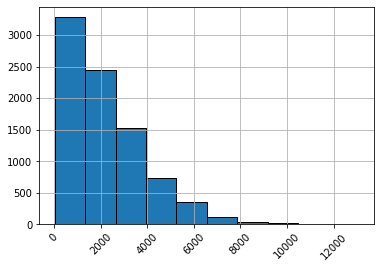

In [7]:

sales_filter = df.loc[:, 'Item_Outlet_Sales'] <= 90000
df.loc[sales_filter, 'Item_Outlet_Sales'].hist(bins = 10,
                                   edgecolor='black')
plt.xticks(rotation = 45)
plt.ticklabel_format(useOffset=False, style='plain')

Segun el grafico de arriba. lo datos historicos de ventas en los supermercados muestra que mas de 3000 reportes de ventas tiene un aproximado cercano a los 2000 articulos vendidos, por tienda. el otros 2500 reportes tienen un aproximado de ventas entre un poco menos de 2000 y un poco más de 2000. el los siguientes tiene menos rportes de ventas con más cantidades vendidas.

**Boxplot para ver resúmenes estadísticos de diversas características en el conjunto de datos.**

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


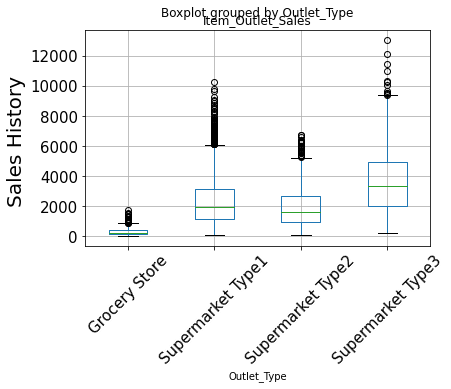

In [8]:
df.boxplot(column = 'Item_Outlet_Sales', by = 'Outlet_Type');
plt.xticks(rotation = 45)

plt.ylabel('Sales History ', fontsize = 20);
plt.xticks(fontsize = 15);
plt.yticks(fontsize = 15);

           
           

de acuerdo con la grrafica anterior hay muchos datos a tipicos en todos los supermercados. en las Gocery Store elhistorico de ventas de mens de 1000 articulos, los super market Type 1 y 2 son un poco parecidos los datos aunque el Type 1 tiene más datos atipicos, la mayoriadelacantidad de articulos vendidos estan entre unos 1000 y 3000 con unos datos atipicosque van hasta casi los 10000 en supermatket  Type1 y hasta unos 7000 en el supermarquet Type 2, en el supermarket Type 3 losvalores estan un poco sesgados a la derecha, la mayoria de articulosvendidosvan entre 2000 y 5000 con unos valosres atipicosque van más de los 12000. esto puede ser por causa de algunas temporadas del año que se vende más en todas las tiendas.

**Mapa de calor de la correlación entre las características.**

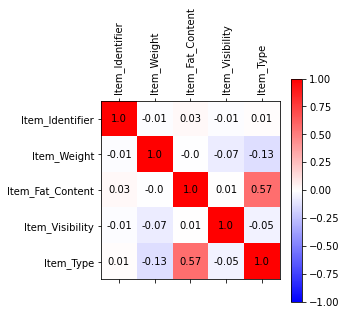

In [9]:
#Matriz de Correlación
matriz= df.corr()
plt.matshow(matriz, cmap="bwr", vmin=-1, vmax=1)
plt.xticks(range(5),df.columns, rotation=90)
plt.yticks(range(5),df.columns)

for i in range(len(matriz.columns)):
  for j in range(len(matriz.columns)):
      plt.text(i, j, round(matriz.iloc[i, j], 2), ha="center", va="center")

plt.colorbar()
plt.show()

Según el mapa de calor hay una correlación un pocofuerte y positiva entre item_Type e Item_fat_content y unaleve relacion negativa entre Item_Type e Item_Weight


In [10]:
sould_per_itemtype = df.groupby(['Item_Type'])['Item_Outlet_Sales'].mean()
sould_per_itemtype 

Item_Type
Baking Goods             1952.971207
Breads                   2204.132226
Breakfast                2111.808651
Canned                   2225.194904
Dairy                    2232.542597
Frozen Foods             2132.867744
Fruits and Vegetables    2289.009592
Hard Drinks              2139.221622
Health and Hygiene       2010.000265
Household                2258.784300
Meat                     2158.977911
Others                   1926.139702
Seafood                  2326.065928
Snack Foods              2277.321739
Soft Drinks              2006.511735
Starchy Foods            2374.332773
Name: Item_Outlet_Sales, dtype: float64

Text(0.5, 1.0, 'Historical Average Sold Per Item Type')

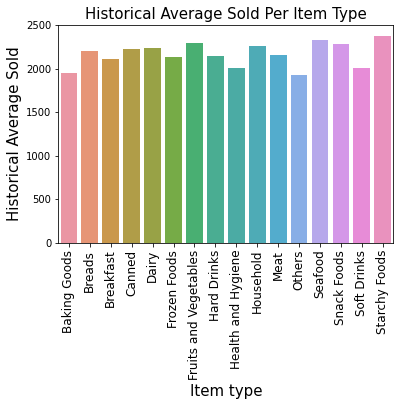

In [11]:
sns.barplot(x = sould_per_itemtype.index, y = sould_per_itemtype.values);
plt.xticks(rotation = 90);
plt.ylim(bottom=0,top=2500)
plt.xlabel('Item type', fontsize = 15)
plt.xticks(fontsize = 12);
plt.ylabel('Historical Average Sold', fontsize = 15)
plt.title('Historical Average Sold Per Item Type', fontsize = 15)

Según el grafico de barras anterior donde muestra el promedio de las ventas historicas de los tipos de articulos de los supermercados, los tipos de articulo Baking Goods y Health and Hygiene tuvieron una venta promediopor debajo de los 2000 articulos vendidos y elque se vendió más es Starchy Foods.

In [12]:
visibility_Item = df.groupby(['Item_Type'])['Item_Visibility'].mean()
visibility_Item


Item_Type
Baking Goods             0.069169
Breads                   0.066255
Breakfast                0.085723
Canned                   0.068129
Dairy                    0.072427
Frozen Foods             0.065645
Fruits and Vegetables    0.068513
Hard Drinks              0.064943
Health and Hygiene       0.055216
Household                0.061322
Meat                     0.062284
Others                   0.060241
Seafood                  0.074976
Snack Foods              0.066850
Soft Drinks              0.063972
Starchy Foods            0.067564
Name: Item_Visibility, dtype: float64

Text(0.5, 1.0, 'Historical Average Visibility Per Item Type')

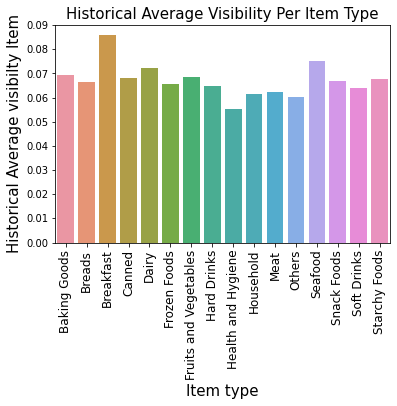

In [13]:
sns.barplot(x = visibility_Item.index, y = visibility_Item.values);

plt.xticks(rotation = 90);
plt.ylim(bottom=0,top=0.09)
plt.xlabel('Item type', fontsize = 15)
plt.xticks(fontsize = 12);
plt.ylabel('Historical Average visibilty Item', fontsize = 15)
plt.title('Historical Average Visibility Per Item Type', fontsize = 15)

el grafico anterior muestra que el Breakfast tiene más visibilidad que los dmás Itmes perocomparado con el penultimo grafico, no es el que más ventas tiene. ya que el que más ventas tiene es el Starchy Foods y no es elque tienemás vibilidad.

**Aprendizaje Automatico**

In [14]:
df


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [16]:
print(df.isna().sum().sum(), 'missing values')

3873 missing values


faltan 3873 datos en 2 columnas 

In [17]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [18]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')

In [19]:
# Codificación ordinal "Outlet_Size"
replacement_dictionary = {'High':2,  'Medium':1, 'Small':0}
df['Outlet_Size'].replace(replacement_dictionary, inplace=True)
df['Outlet_Size']

0       1.0
1       1.0
2       1.0
3       NaN
4       2.0
       ... 
8518    2.0
8519    NaN
8520    0.0
8521    1.0
8522    0.0
Name: Outlet_Size, Length: 8523, dtype: float64

In [20]:
# Division validación
X = df.drop('Item_Outlet_Sales', axis=1)
y = df['Item_Outlet_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [21]:
# Instanciar selectores de columnas 
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [22]:
#Instanciar los transformadores

# Imputers
freq_imputer_categ = SimpleImputer(strategy='most_frequent')
mean_imputer_num = SimpleImputer(strategy='mean')
# Scaler
scaler = StandardScaler()
# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [23]:
# se usaran dos pipeline  uno para los datos categoricos y otro para los númericos 
#instanciar pipeline
# Numeric pipeline
numeric_pipe = make_pipeline(mean_imputer_num, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [24]:
# Categorical pipeline
categorical_pipe = make_pipeline(freq_imputer_categ, ohe)
categorical_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [25]:
# Tuples para Column Transformer
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)
# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f753d93da50>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f753d93d9d0>)])

In [26]:
# fit on train
#ajustar los datos
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f753d93da50>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f753d93d9d0>)])

In [27]:
# transform train and test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [28]:
# Comprobando los valores faltantes y que los datos se escalen y tengan una codificación one-hot
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
X_train_processed

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (6392, 1593)




array([[ 0.81724868, -0.71277507,  1.82810922, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.5563395 , -1.29105225,  0.60336888, ...,  0.        ,
         1.        ,  0.        ],
       [-0.13151196,  1.81331864,  0.24454056, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.11373638, -0.92052713,  1.52302674, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.76600931, -0.2277552 , -0.38377708, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.81724868, -0.95867683, -0.73836105, ...,  1.        ,
         0.        ,  0.        ]])

**crear un modelo de regresión lineal para predecir las ventas.**

In [29]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

In [30]:
lin_reg.fit(X_train_processed, y_train)

LinearRegression()

In [35]:
# Predicciones conjunto de entrenamiento
train_predict = lin_reg.predict(X_train_processed)
# predicciones conjunto de prueba
test_predict = lin_reg.predict(X_test_processed)

print(train_predict)

print(test_predict)

[2962.  3733.5 2304.  ... 4743.5  978.  1225. ]
[ 842.  893. 1262. ... 4467. 2208. 2432.]


In [41]:
#Métrica 
from sklearn.metrics import r2_score

r2_train = r2_score(y_train, train_predict )
r2_test = r2_score(y_test, test_predict)

 
print(r2_train)
print(r2_test)

0.6670401090775921
-4.12595191053953e+20


In [53]:
from sklearn.metrics import mean_squared_error


In [56]:
#Error Cuadratico Medio
ecm_train = mean_squared_error(y_train, train_predict)
ecm_test = mean_squared_error(y_test, test_predict)

print (ecm_test)

1.1383407611761038e+27


In [62]:
# Raiz Error Cuadratico Medio
recm_train = np.sqrt(mean_squared_error(y_train, train_predict))
recm_test =  np.sqrt(mean_squared_error(y_test, test_predict))
print(recm_train)
print("Valor de métrica RECM:",mean_squared_error(y_test, test_predict, squared=False))


992.6631093018722
Valor de métrica RECM: 33739305878694.418


**modelo de árbol de regresión para predecir las ventas**

In [65]:
from sklearn.tree import DecisionTreeRegressor

In [69]:
arb_reg = DecisionTreeRegressor( random_state=42)
arb_reg.fit(X_train_processed, y_train)

DecisionTreeRegressor(random_state=42)

In [70]:
#Predicciones 
train_predict_arb = arb_reg.predict(X_train_processed)
test_predict_arb = arb_reg.predict(X_test_processed)

In [73]:
#Evaluar el modelo
train_score_arb = r2_score(train_predict_arb, y_train)
test_score_arb = r2_score(test_predict_arb, y_test)
print(train_score_arb)
print(test_score_arb)

1.0
0.2496974613638474


In [78]:
#Rendimiento del modelo 
#Error Cuadratico Medio
ecm_train_arb = mean_squared_error(y_train, train_predict_arb)
ecm_test_arb = mean_squared_error(y_test, test_predict_arb)
print(ecm_train_arb)
print (ecm_test_arb)


0.0
2147758.76493781


In [77]:
# Raiz Error Cuadratico Medio
recm_train_arb = np.sqrt(mean_squared_error(y_train, train_predict_arb))
recm_test_arb =  np.sqrt(mean_squared_error(y_test, test_predict_arb))
print(recm_train_arb)
print("Valor de métrica RECM:",mean_squared_error(y_test, test_predict_arb, squared=False))


0.0
Valor de métrica RECM: 1465.5233757732458


**Según las metricas realizadas a los 2 modelos, el mejor modelo de predicción para este set de datos es el de árboles de decisión**